In [1]:
import pandas as pd

In [2]:
########### file_name 선언 ##################################
전처리데이터셋 = '격자30.xlsx'
##########################################################

In [3]:
df = pd.read_excel(f'{전처리데이터셋}', header=0)

In [4]:
df

,id,lon,lat,주차장,주정차,주차면수,세대수,대중교통,연면적,가점1,가점2,가점3,가점4,총인구,면적,인구밀도,등록대수,주차수요
0,180,129.07783,35.15141,0,0,NaN,NaN,0,NaN,0,0,0,0,24254,5424588,4471.123,2541,NaN
1,213,129.08053,35.15581,0,0,NaN,NaN,0,NaN,0,0,0,0,24254,5424588,4471.123,2541,NaN
2,214,129.08053,35.15361,0,0,NaN,NaN,0,NaN,0,0,0,0,24254,5424588,4471.123,2541,NaN
3,215,129.08053,35.15141,0,0,NaN,NaN,0,NaN,0,0,0,0,24254,5424588,4471.123,2541,NaN
4,216,129.08053,35.14920,0,0,NaN,NaN,0,NaN,0,0,0,0,24254,5424588,4471.123,2541,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,191,129.07783,35.12717,1,0,670.0,1096.0,0,44541.1800,1,2,0,40,9131,1749284,5219.850,348,2035.94335
539,192,129.07783,35.12496,5,6,42.0,328.0,0,25683.0200,13,25,0,155,9131,1749284,5219.850,348,16893.80567
540,193,129.07783,35.12276,2,0,113.0,0.0,0,4170.0000,4,0,2,2,9131,1749284,5219.850,348,787.86926
541,226,129.08053,35.12717,5,21,31.0,315.0,2,32323.2700,7,6,0,7,9131,1749284,5219.850,348,845.28091


In [6]:
총칼럼 = df.columns.tolist()
print(총칼럼)

['id', 'lon', 'lat', '주차장', '주정차', '주차면수', '세대수', '대중교통', '연면적', '가점1', '가점2', '가점3', '가점4', '총인구', '면적', '인구밀도', '등록대수', '주차수요']


In [7]:
#점수칼럼 =  ['건물1', '건물2', '건물3', '관공서', '도서관', '경제인구', '교통량', '전기차', '관광지']
점수칼럼 =  [ '주정차', '주차면수',  '대중교통', '연면적', '가점1', '가점2', '가점3', '가점4', '총인구', '면적', '인구밀도', '등록대수']
print("입력한 점수컬럼명은 다음과 같음\n", 점수칼럼)
print(len(점수칼럼))
가중치 = [1] * len(점수칼럼)

입력한 점수컬럼명은 다음과 같음
 ['주정차', '주차면수', '대중교통', '연면적', '가점1', '가점2', '가점3', '가점4', '총인구', '면적', '인구밀도', '등록대수']
12


In [8]:

가중치 = [0,1.0187 , 0, 0.9991,1,2,  3,4,0.9962,1,0, 1.0489]

In [9]:
len(가중치)

12

In [10]:
if (len(가중치) != len(점수칼럼)):
    print("입력한 가중치 갯수가 점수칼럼 갯수와 다르므로 확인후 다시 입력 바랍니다") 
    
else: 
    print("다음 줄을 실행 하세요")

다음 줄을 실행 하세요


In [11]:
df = pd.read_excel(f'{전처리데이터셋}', header=0)
df.set_index('lon', inplace=True)

################## QGIS에서 작업한 전처리 결과 CSV 읽기 ####################################################
pre_process_set = pd.read_excel(f'{전처리데이터셋}', header=0)
pre_process_set = pre_process_set.sort_values(by='lon')

# Null 이 있을 수 있는 칼럼은 Null을 0로 변경
pre_process_set.fillna(0, inplace=True)
##################  QGIS에서 작업한 전처리 결과 CSV 읽기 끝###################################################

################## MinMax정규화 ##########################################################################
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# 점수칼럼 정규화
norm = pre_process_set.copy()
norm.fillna(0, inplace=True)
norm.set_index('lon', inplace=True)

norm[점수칼럼] = scaler.fit_transform(norm.loc[:,점수칼럼])
norm.reset_index(inplace=True)
################## 정규화 끝################################################################################


# 총점 계산
df = norm.copy()

for i in range(0, len(점수칼럼)):
    name = 점수칼럼[i]
    df[name] = df[name] * 가중치[i] 

df.set_index(['id','lon','lat',], inplace=True)

df['sum'] = df.sum(1)
df.reset_index(inplace=True)

# 등수 계산 
df['순위'] = df['sum'].rank(method='dense', ascending=False).astype(int)

final = df.sort_values(by='순위')
final.reset_index(drop=True, inplace=True)

# 상위 20개만 학인
display("결과", final.head(20))



'결과'

,id,lon,lat,주차장,주정차,주차면수,세대수,대중교통,연면적,가점1,가점2,가점3,가점4,총인구,면적,인구밀도,등록대수,주차수요,sum,순위
0,192,129.07783,35.12496,5,0.0,0.003388,328.0,0.0,0.140118,0.183099,0.467290,0.00000,1.275720,0.164958,0.234155,0.0,0.000000,16893.80567,17229.274398,1
1,86,129.06975,35.12717,12,0.0,0.018071,110.0,0.0,0.099087,0.098592,0.598131,0.18750,4.000000,0.052368,0.065403,0.0,0.450553,15294.19105,15421.760755,2
2,120,129.07244,35.12937,0,0.0,0.000000,18.0,0.0,0.030256,0.014085,0.112150,0.28125,0.674897,0.164958,0.234155,0.0,0.000000,12216.20551,12235.717260,3
3,296,129.08592,35.12717,6,0.0,0.001856,47.0,0.0,0.064034,0.042254,0.112150,0.00000,0.880658,0.148527,0.125166,0.0,1.048900,9047.85736,9103.280905,4
4,227,129.08053,35.12496,11,0.0,0.043323,1213.0,0.0,0.365473,0.000000,0.299065,0.00000,0.337449,0.000000,0.000000,0.0,0.178404,7324.55113,8549.774844,5
5,261,129.08322,35.12717,8,0.0,0.057200,755.0,0.0,0.405913,0.070423,0.168224,0.00000,0.748971,0.164958,0.234155,0.0,0.000000,7783.40807,8548.257914,6
6,262,129.08322,35.12496,2,0.0,0.005002,26.0,0.0,0.251581,0.169014,0.074766,0.00000,0.584362,0.000000,0.000000,0.0,0.178404,7637.81028,7667.073409,7
7,646,129.11287,35.12717,0,0.0,0.000000,7465.0,0.0,0.584287,0.056338,0.074766,1.03125,0.683128,0.996200,0.258103,0.0,0.996288,53.70854,7523.388899,8
8,87,129.06975,35.12496,4,0.0,0.003308,3.0,0.0,0.033942,0.028169,0.280374,0.00000,1.596708,0.164958,0.234155,0.0,0.000000,5320.13146,5329.473074,9
9,85,129.06975,35.12937,9,0.0,0.005163,70.0,0.0,0.085733,0.014085,0.186916,0.00000,0.312757,0.052368,0.065403,0.0,0.450553,5209.56691,5289.739888,10


In [12]:
final.sort_values(by=['순위'])

,id,lon,lat,주차장,주정차,주차면수,세대수,대중교통,연면적,가점1,가점2,가점3,가점4,총인구,면적,인구밀도,등록대수,주차수요,sum,순위
0,192,129.07783,35.12496,5,0.0,0.003388,328.0,0.0,0.140118,0.183099,0.467290,0.00000,1.275720,0.164958,0.234155,0.0,0.000000,16893.80567,17229.274398,1
1,86,129.06975,35.12717,12,0.0,0.018071,110.0,0.0,0.099087,0.098592,0.598131,0.18750,4.000000,0.052368,0.065403,0.0,0.450553,15294.19105,15421.760755,2
2,120,129.07244,35.12937,0,0.0,0.000000,18.0,0.0,0.030256,0.014085,0.112150,0.28125,0.674897,0.164958,0.234155,0.0,0.000000,12216.20551,12235.717260,3
3,296,129.08592,35.12717,6,0.0,0.001856,47.0,0.0,0.064034,0.042254,0.112150,0.00000,0.880658,0.148527,0.125166,0.0,1.048900,9047.85736,9103.280905,4
4,227,129.08053,35.12496,11,0.0,0.043323,1213.0,0.0,0.365473,0.000000,0.299065,0.00000,0.337449,0.000000,0.000000,0.0,0.178404,7324.55113,8549.774844,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,145,129.07514,35.15141,0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.193229,0.139925,0.0,0.450553,0.00000,0.783707,367
541,12,129.06436,35.13598,0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.052368,0.065403,0.0,0.450553,0.00000,0.568324,368
539,15,129.06436,35.12937,0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.052368,0.065403,0.0,0.450553,0.00000,0.568324,368
540,13,129.06436,35.13378,0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.052368,0.065403,0.0,0.450553,0.00000,0.568324,368


In [13]:
# 최종 결과 CSV 파일쓰기
final.to_excel('0813결과.xlsx',index = False)

In [14]:
# 보고 싶은 상위권 갯수를 입력하세요
지도보기갯수 = 30   # 보고싶은 상위권 갯수를 여기에 입력, 만약 3이면 최상위 3개만 보겠다는 의미

In [15]:
# 지도로 보여주기
import folium
print(f"보고자 하는 상위권 갯수는 {지도보기갯수}개 입니다.")
for i in range(지도보기갯수):
    지도보기 = folium.Map(location=[final.loc[i,'lat'],final.loc[i,'lon']], zoom_start = 15)
    folium.Marker([final.loc[i,'lat'],final.loc[i,'lon']]).add_to(지도보기)
    print (final.loc[i,'lat'],final.loc[i,'lon'])
    j = i+1
    display(f'상위 {j}번째 격자의 센터 위치 보기', 지도보기)

보고자 하는 상위권 갯수는 30개 입니다.
35.12496 129.07783


'상위 1번째 격자의 센터 위치 보기'

35.12717 129.06975


'상위 2번째 격자의 센터 위치 보기'

35.12937 129.07244


'상위 3번째 격자의 센터 위치 보기'

35.12717 129.08592


'상위 4번째 격자의 센터 위치 보기'

35.12496 129.08053


'상위 5번째 격자의 센터 위치 보기'

35.12717 129.08322


'상위 6번째 격자의 센터 위치 보기'

35.12496 129.08322


'상위 7번째 격자의 센터 위치 보기'

35.12717 129.11287


'상위 8번째 격자의 센터 위치 보기'

35.12496 129.06975


'상위 9번째 격자의 센터 위치 보기'

35.12937 129.06975


'상위 10번째 격자의 센터 위치 보기'

35.12717 129.07244


'상위 11번째 격자의 센터 위치 보기'

35.12276 129.08053


'상위 12번째 격자의 센터 위치 보기'

35.13598 129.08053


'상위 13번째 격자의 센터 위치 보기'

35.12717 129.07783


'상위 14번째 격자의 센터 위치 보기'

35.10292 129.11826


'상위 15번째 격자의 센터 위치 보기'

35.12496 129.07244


'상위 16번째 격자의 센터 위치 보기'

35.14259 129.10209


'상위 17번째 격자의 센터 위치 보기'

35.11614 129.11287


'상위 18번째 격자의 센터 위치 보기'

35.11394 129.11287


'상위 19번째 격자의 센터 위치 보기'

35.10953 129.11287


'상위 20번째 격자의 센터 위치 보기'

35.13157 129.09939


'상위 21번째 격자의 센터 위치 보기'

35.11835 129.11017


'상위 22번째 격자의 센터 위치 보기'

35.12717 129.10748


'상위 23번째 격자의 센터 위치 보기'

35.13157 129.0967


'상위 24번째 격자의 센터 위치 보기'

35.12276 129.11017


'상위 25번째 격자의 센터 위치 보기'

35.11835 129.10748


'상위 26번째 격자의 센터 위치 보기'

35.14039 129.06975


'상위 27번째 격자의 센터 위치 보기'

35.11614 129.11017


'상위 28번째 격자의 센터 위치 보기'

35.11394 129.11017


'상위 29번째 격자의 센터 위치 보기'

35.12055 129.11017


'상위 30번째 격자의 센터 위치 보기'

In [16]:
import matplotlib.pyplot as plt

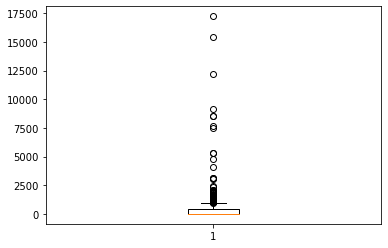

In [17]:
plt.figure()
plt.boxplot(final['sum'])
plt.show()